<a href="https://colab.research.google.com/github/wgcv/03MAIR-Algoritmos-de-Optimizacion/blob/main/AG2/Algoritmos_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG3 - Actividad Guiada 3
Nombre: Washington Gustavo Cevallos Vaca <br>
Link:   https://colab.research.google.com/github/wgcv/03MAIR-Algoritmos-de-Optimizacion/blob/main/AG2/Algoritmos_AG3.ipynb <br>
Github: https://github.com/wgcv/03MAIR-Algoritmos-de-Optimizacion
<br>




In [ ]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

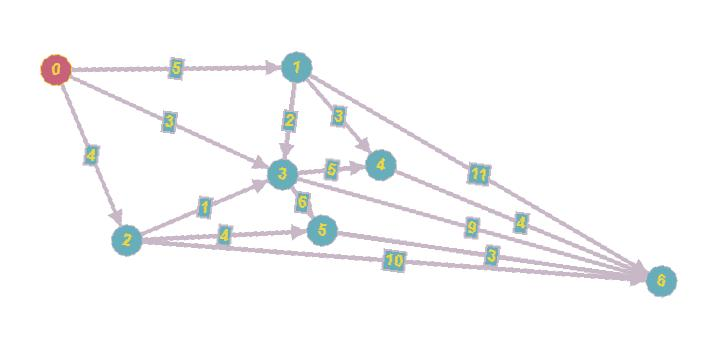

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta pasa por :")
print(calcular_ruta(RUTA, 0,6) )
print("Con valor" , PRECIOS[0][6])



La ruta pasa por :
0,2,5
Con valor 11


##Problema de Asignacion de tarea

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((0, 1, 2, 3  ),COSTES)

73

## Medir el tiempo con decorador

In [ ]:
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        print(f"\nLa función {func.__name__} tardó {end - start:.6f} segundos\n")
        print("-"*10 + "\n")
        return result
    return wrapper

## Copié la funcion de fuerza bruta para ver como trabaja del ejemplo

In [ ]:
import math
import itertools
@timeit
def fuerza_bruta(COSTES):
  #Representacion de la solucion será una tupla donde cada valor en la cordenada i-sima es la tarea asignado al agente i
  # Ejemplo (1,2,3,4) Tiene valor 11+15+19+28=73
  #
  #¿Cuantas posibilidades hay? n! -> Complejidad factorial (exponecial)
  #Con dimension 11 se va a 1 minuto de ejecucion
  mejor_valor = math.inf
  mejor_solucion = ()
  for s in itertools.permutations(range(len(COSTES))):
    #print(s, valor (s, COSTES))
    valor_tmp = valor(s, COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
  print(mejor_solucion)
fuerza_bruta(COSTES)

(0, 3, 1, 2)

La función fuerza_bruta tardó 0.000071 segundos

----------



In [ ]:
                #Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
@timeit
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
  del NODOS
  del HIJOS
  del NODO_FINAL

ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4

La función ramificacion_y_poda tardó 0.000861 segundos

----------



## Análisis de mejora de notas

### Funcion n dimensión de costes

In [ ]:
import random

def matriz_random(filas, columnas, minimo=0, maximo=9):
    return [
        [random.randint(minimo, maximo) for _ in range(columnas)]
        for _ in range(filas)
    ]
def imprimir_matriz(matriz):
    for fila in matriz:
        print(" ".join(str(elemento) for elemento in fila))


### Probar con Dimesión 4

In [ ]:
COSTES4=matriz_random(4,4,1,100)
fuerza_bruta(COSTES4)
ramificacion_y_poda(COSTES4)

(3, 0, 1, 2)

La función fuerza_bruta tardó 0.000163 segundos

----------

La solucion final es: [{'s': (1, 2, 3, 0), 'ci': 95}]  en  14  iteraciones  para dimension:  4

La función ramificacion_y_poda tardó 0.000208 segundos

----------



### Probar con Dimesión 5 al 11.

Luego de invertir muchas horas intentando entender qué pasaba cuando corría loops de dimensiones mayores a 11, jugar con memoria y analizar los algoritmos cuando ejecutaba fuerza bruta y ramificación y poda en loops (fuerza bruta era más eficiente luego de dimensiones 10), descubrí que el kernel de Jupyter (Colab es un  fork), los heap y los outputs no se liberan igual que en un proceso normal. Por lo cual el garbage collector o usar threads independientes hacía que las ejecuciones en loop fueran cada vez más lentas, cosa que no pasaba si ejecutaba una celda única. Por lo tanto, lo mejor fue ejecutar directamente Python con !python test.py.

Luego de muchas pruebas, llego a la conclusión que Google Colab comparte recursos y es poco predesible cuantos recursos tienes y cuando va a parar un recursos si llega al 100% del CPU, lo cual da a veces ejecuta matrices de dimesion 11 y otra veces no.

In [ ]:
!python test.py

# test.py
# import gc
# import random
# import math
# import itertools

# import time
# from functools import wraps

# def matriz_random(filas, columnas, minimo=0, maximo=9):
#     return [
#         [random.randint(minimo, maximo) for _ in range(columnas)]
#         for _ in range(filas)
#     ]
# def imprimir_matriz(matriz):
#     for fila in matriz:
#         print(" ".join(str(elemento) for elemento in fila))
#                 #Coste inferior para soluciones parciales
# #  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

# def timeit(func):
#     @wraps(func)
#     def wrapper(*args, **kwargs):
#         start = time.perf_counter()
#         result = func(*args, **kwargs)
#         end = time.perf_counter()
#         print(f"\nLa función {func.__name__} tardó {end - start:.6f} segundos\n")
#         print("-"*10 + "\n")
#         return result
#     return wrapper

# def valor(S,COSTES):
#   VALOR = 0
#   for i in range(len(S)):
#     VALOR += COSTES[S[i]][i]
#   return VALOR


# @timeit
# def fuerza_bruta(COSTES):
#   #Representacion de la solucion será una tupla donde cada valor en la cordenada i-sima es la tarea asignado al agente i
#   # Ejemplo (1,2,3,4) Tiene valor 11+15+19+28=73
#   #
#   #¿Cuantas posibilidades hay? n! -> Complejidad factorial (exponecial)
#   #Con dimension 11 se va a 1 minuto de ejecucion
#   mejor_valor = math.inf
#   mejor_solucion = ()
#   for s in itertools.permutations(range(len(COSTES))):
#     #print(s, valor (s, COSTES))
#     valor_tmp = valor(s, COSTES)
#     if valor_tmp < mejor_valor:
#       mejor_valor = valor_tmp
#       mejor_solucion = s
#   print(mejor_solucion)

# def CI(S,COSTES):
#   VALOR = 0
#   #Valores establecidos
#   for i in range(len(S)):
#     VALOR += COSTES[i][S[i]]

#   #Estimacion
#   for i in range( len(S), len(COSTES)   ):
#     VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
#   return VALOR

# def CS(S,COSTES):
#   VALOR = 0
#   #Valores establecidos
#   for i in range(len(S)):
#     VALOR += COSTES[i][S[i]]

#   #Estimacion
#   for i in range( len(S), len(COSTES)   ):
#     VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
#   return VALOR

# #Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
# #(0,) -> (0,1), (0,2), (0,3)
# def crear_hijos(NODO, N):
#   HIJOS = []
#   for i in range(N ):
#     if i not in NODO:
#       HIJOS.append({'s':NODO +(i,)    })
#   return HIJOS
# @timeit
# def ramificacion_y_poda(COSTES):
# #Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
# #Nodos del grafo  { s:(1,2),CI:3,CS:5  }
#   #print(COSTES)
#   DIMENSION = len(COSTES)
#   MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
#   CotaSup = valor(MEJOR_SOLUCION,COSTES)
#   #print("Cota Superior:", CotaSup)

#   NODOS=[]
#   NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

#   iteracion = 0

#   while( len(NODOS) > 0):
#     iteracion +=1

#     nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
#     #print("Nodo prometedor:", nodo_prometedor)

#     #Ramificacion
#     #Se generan los hijos
#     HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

#     #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
#     NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
#     if len(NODO_FINAL ) >0:
#       #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
#       if NODO_FINAL[0]['ci'] < CotaSup:
#         CotaSup = NODO_FINAL[0]['ci']
#         MEJOR_SOLUCION = NODO_FINAL

#     #Poda
#     HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

#     #Añadimos los hijos
#     NODOS.extend(HIJOS)

#     #Eliminamos el nodo ramificado
#     NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

#   print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
#   del NODOS
#   del HIJOS
#   del NODO_FINAL


# gc.collect()

# costes=[]
# for i in range(5, 12):
#   costes.append(matriz_random(i,i,1,100))

# for i in costes:
#   print(f"Matriz {len(i)}x{len(i[0])}")
#   gc.collect(generation=2)
#   ramificacion_y_poda(i)

# gc.collect(generation=2)

# for i in costes:
#   print(f"Matriz {len(i)}x{len(i[0])}")
#   gc.collect(generation=2)
#   fuerza_bruta(i)


Matriz 5x5
La solucion final es: [{'s': (0, 3, 4, 1, 2), 'ci': 125}]  en  27  iteraciones  para dimension:  5

La función ramificacion_y_poda tardó 0.000512 segundos

----------

Matriz 6x6
La solucion final es: [{'s': (5, 3, 2, 1, 0, 4), 'ci': 187}]  en  107  iteraciones  para dimension:  6

La función ramificacion_y_poda tardó 0.002959 segundos

----------

Matriz 7x7
La solucion final es: [{'s': (2, 0, 3, 5, 1, 6, 4), 'ci': 139}]  en  99  iteraciones  para dimension:  7

La función ramificacion_y_poda tardó 0.003390 segundos

----------

Matriz 8x8
La solucion final es: [{'s': (0, 6, 5, 3, 4, 2, 1, 7), 'ci': 187}]  en  545  iteraciones  para dimension:  8

La función ramificacion_y_poda tardó 0.050487 segundos

----------

Matriz 9x9
La solucion final es: [{'s': (7, 4, 2, 0, 5, 6, 3, 8, 1), 'ci': 184}]  en  900  iteraciones  para dimension:  9

La función ramificacion_y_poda tardó 0.130648 segundos

----------

Matriz 10x10
La solucion final es: [{'s': (9, 2, 8, 7, 5, 3, 4, 1, 0, 6)

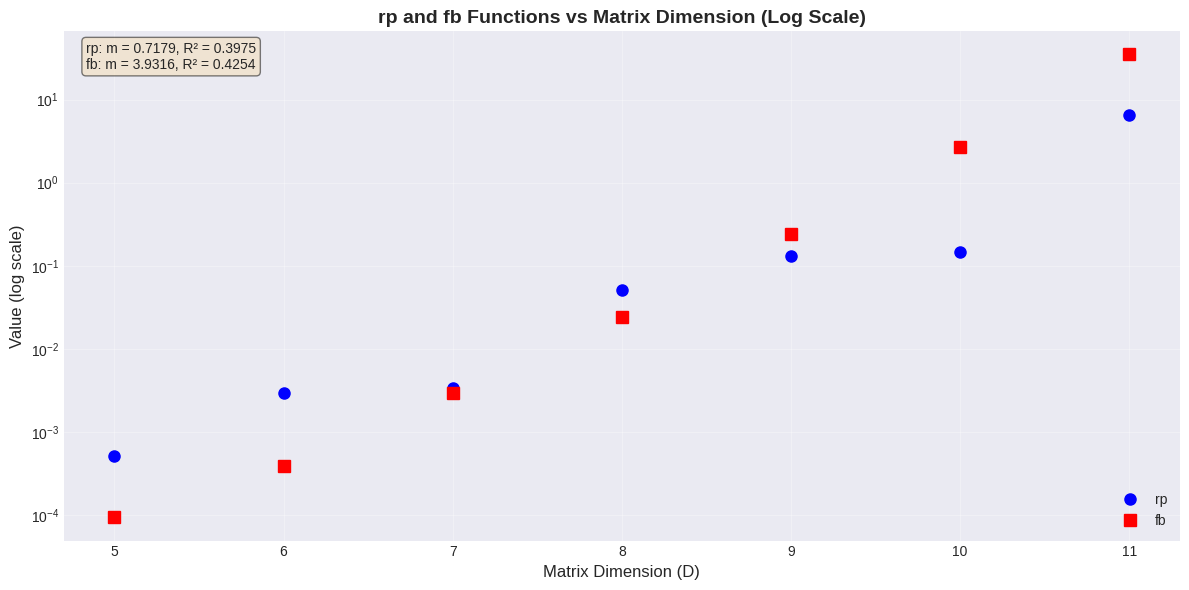

Regression Statistics:
Ramificación y Poda: slope (m) = 0.717856
Fuerza Bruta: slope (m) = 3.931610


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Data
days = [5, 6, 7, 8, 9, 10, 11]
rp = [0.000512, 0.002959, 0.003390, 0.050487, 0.130648, 0.147704, 6.561585]
fb = [0.000094, 0.000389, 0.002961, 0.024314, 0.243010, 2.657075, 34.843978]

# Calculate linear regression for both datasets
slope_rp, intercept_rp, r_rp, p_rp, se_rp = stats.linregress(days, rp)
slope_fb, intercept_fb, r_fb, p_fb, se_fb = stats.linregress(days, fb)

# Generate regression lines
regression_rp = [slope_rp * x + intercept_rp for x in days]
regression_fb = [slope_fb * x + intercept_fb for x in days]

# Create the plot with log scale
plt.figure(figsize=(12, 6))

# Plot data points only
plt.semilogy(days, rp, 'o', label='rp', color='blue', markersize=8)
plt.semilogy(days, fb, 's', label='fb', color='red', markersize=8)

# Labels and formatting
plt.xlabel('Matrix Dimension (D)', fontsize=12)
plt.ylabel('Value (log scale)', fontsize=12)
plt.title('rp and fb Functions vs Matrix Dimension (Log Scale)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add text box with regression statistics
textstr = f'rp: m = {slope_rp:.4f}, R² = {r_rp**2:.4f}\nfb: m = {slope_fb:.4f}, R² = {r_fb**2:.4f}'
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"Regression Statistics:")
print(f"Ramificación y Poda: slope (m) = {slope_rp:.6f}")
print(f"Fuerza Bruta: slope (m) = {slope_fb:.6f}")

## ¿A partir de que dimensión el algoritmo por fuerza bruta deja de ser una opción?

A partir de 9 dimensiones fuerza bruta deja de ser una opción recomendada para ejecutar el algoritmo.

## ¿Hay algún valor de la dimensión a partir de la cual el algoritmo de ramificación y poda también deja de ser una opción válida?

A partir de 11 a 13 el timepo de ejecución toma mucho a criterio personal (Algúnos minutos), pero podríamos re escribir el código unsando heap y facilmente superar ese límite.

## Ejemplo con Heap

In [ ]:
import heapq
from functools import wraps
import time

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"{func.__name__} took {end - start:.4f} seconds")
        return result
    return wrapper

def CI(S, COSTES):
    VALOR = 0
    # Valores establecidos
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]

    # Estimación
    for i in range(len(S), len(COSTES)):
        VALOR += min(COSTES[j][i] for j in range(len(COSTES)))
    return VALOR

def crear_hijos(s, dimension):
    # Agentes ya asignados
    asignados = set(s)
    # Generamos hijos añadiendo cada agente no asignado
    for agente in range(dimension):
        if agente not in asignados:
            yield s + (agente,)

def valor(S, COSTES):
    return sum(COSTES[i][S[i]] for i in range(len(S)))

@timeit
def ramificacion_y_poda_heap(COSTES):
    DIMENSION = len(COSTES)
    MEJOR_SOLUCION = tuple(range(DIMENSION))
    CotaSup = valor(MEJOR_SOLUCION, COSTES)

    # Usamos heap para obtener el nodo con menor CI en O(log n)
    heap = [(CI((), COSTES), ())]
    iteracion = 0

    while heap:
        iteracion += 1

        # Extraemos el nodo más prometedor
        ci_actual, nodo_prometedor = heapq.heappop(heap)

        # Si la CI ya supera la cota superior, podamos
        if ci_actual >= CotaSup:
            continue

        # Ramificación: generamos hijos
        for hijo_s in crear_hijos(nodo_prometedor, DIMENSION):
            ci_hijo = CI(hijo_s, COSTES)

            # Si es solución completa
            if len(hijo_s) == DIMENSION:
                if ci_hijo < CotaSup:
                    CotaSup = ci_hijo
                    MEJOR_SOLUCION = hijo_s
            # Si no supera la cota, lo añadimos al heap
            elif ci_hijo < CotaSup:
                heapq.heappush(heap, (ci_hijo, hijo_s))

    print(f"La solución final es: {MEJOR_SOLUCION} en {iteracion} iteraciones para dimensión: {DIMENSION}")
    print(f"Coste óptimo: {CotaSup}")
    return MEJOR_SOLUCION


##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide por le metodo del descenso del gradiente : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion(f) y el gradiente(df)
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

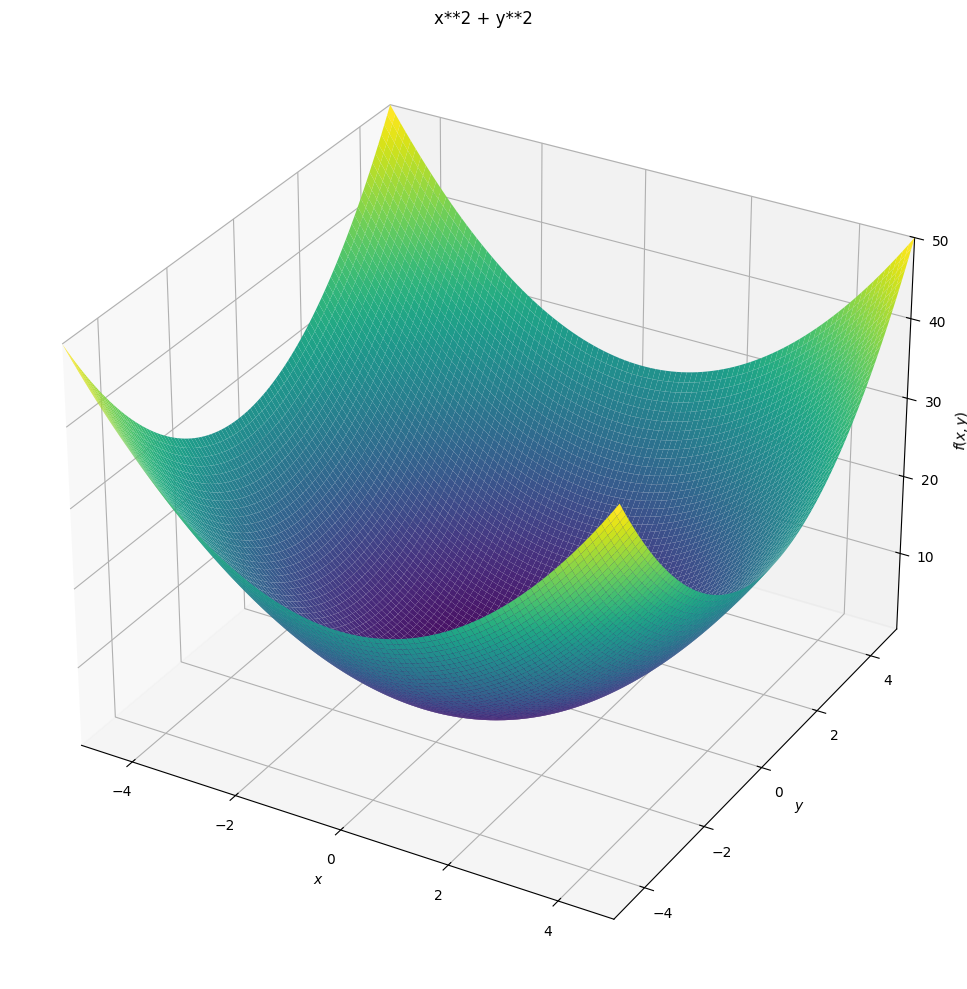

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

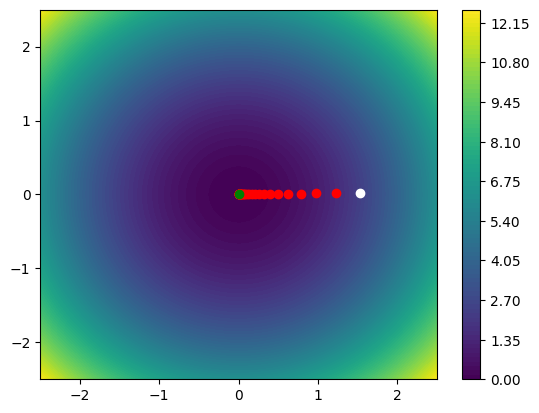

Solucion: [2.1779929054922698e-05, 3.628025921527714e-07] 4.744969353583387e-10


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=2.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:500
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
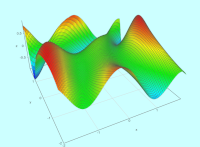


In [ ]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
# Derivadas parciales
df = lambda X: (math.cos(0.5*X[0]**2 - 0.25*y**2 + 3) * X[0] * math.cos(2*X[0] + 1 - math.exp(X[1]))
         - math.sin(0.5*X[0]**2 - 0.25*X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1])) * 2,
                   math.cos(0.5*X[0]**2 - 0.25*X[1]**2 + 3) * (-0.5*X[1]) * math.cos(2*X[0] + 1 - math.exp(X[1]))
         + math.sin(0.5*X[0]**2 - 0.25*X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1])) * math.exp(X[1]))

# df_dy = lambda X: (math.cos(0.5*X[0]**2 - 0.25*X[1]**2 + 3) * (-0.5*X[1]) * math.cos(2*X[0] + 1 - math.exp(X[1]))
#          + math.sin(0.5*X[0]**2 - 0.25*X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1])) * math.exp(X[1]))

# Gradiente
# df = [df_dx, df_dy]


In [ ]:
df([0,0])

(0.0, 0.0)

In [ ]:
df([-1,1])

(-0.18256726377306354, -0.5770369084762905)

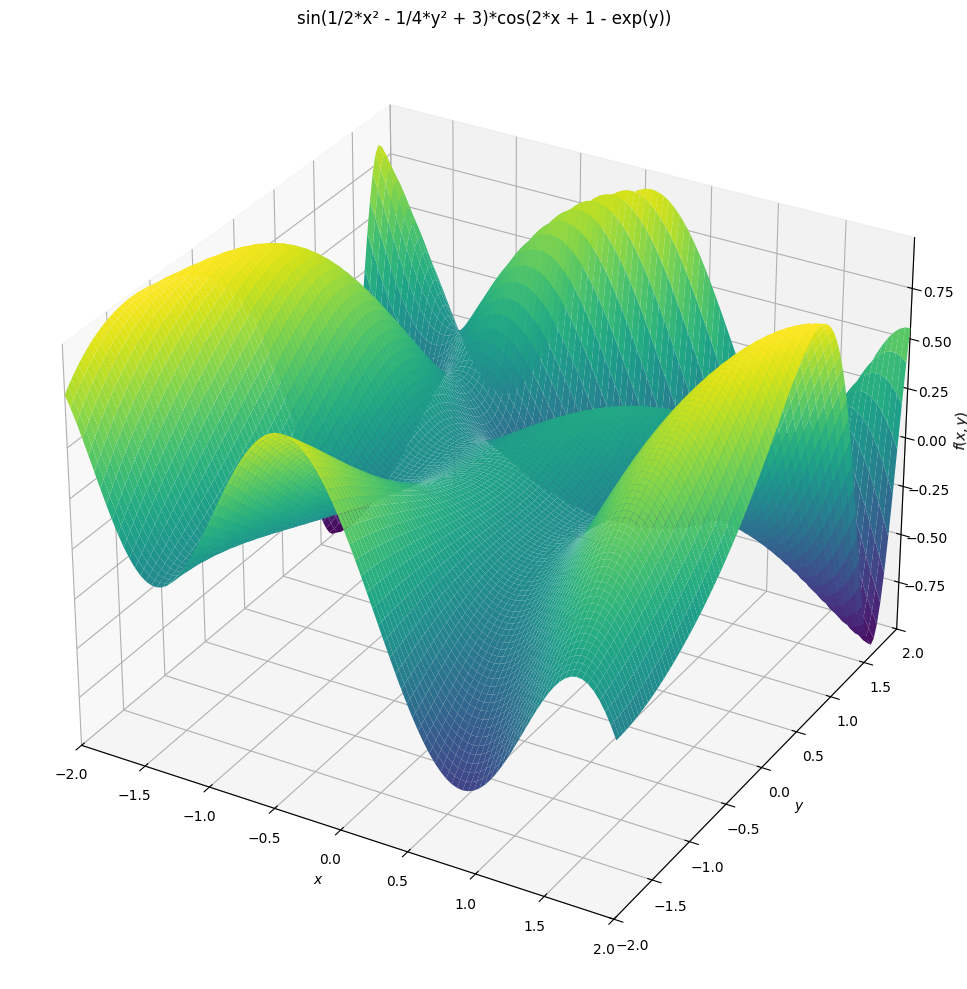

In [ ]:
from sympy import symbols, sin, cos, exp
from sympy.plotting import plot3d

x, y = symbols('x y')

# Define f symbolically using sympy functions (not math functions)
f_symbolic = sin(0.5*x**2 - 0.25*y**2 + 3) * cos(2*x + 1 - exp(y))

plot3d(f_symbolic,
       (x, -2, 2), (y, -2, 2),
       title='sin(1/2*x² - 1/4*y² + 3)*cos(2*x + 1 - exp(y))',
       size=(10, 10))

Iteration 1, Learning Rate: 0.1000
Iteration 2, Learning Rate: 0.1000
Iteration 3, Learning Rate: 0.1000
Iteration 4, Learning Rate: 0.1000
Iteration 5, Learning Rate: 0.1000
Iteration 6, Learning Rate: 0.1000
Iteration 7, Learning Rate: 0.1000
Iteration 8, Learning Rate: 0.1000
Iteration 9, Learning Rate: 0.1000
Iteration 10, Learning Rate: 0.1000
Iteration 11, Learning Rate: 0.1000
Iteration 12, Learning Rate: 0.0999
Iteration 13, Learning Rate: 0.0999
Iteration 14, Learning Rate: 0.0999
Iteration 15, Learning Rate: 0.0999
Iteration 16, Learning Rate: 0.0999
Iteration 17, Learning Rate: 0.0999
Iteration 18, Learning Rate: 0.0999
Iteration 19, Learning Rate: 0.0998
Iteration 20, Learning Rate: 0.0998
Iteration 21, Learning Rate: 0.0998
Iteration 22, Learning Rate: 0.0998
Iteration 23, Learning Rate: 0.0998
Iteration 24, Learning Rate: 0.0997
Iteration 25, Learning Rate: 0.0997
Iteration 26, Learning Rate: 0.0997
Iteration 27, Learning Rate: 0.0997
Iteration 28, Learning Rate: 0.0996
I

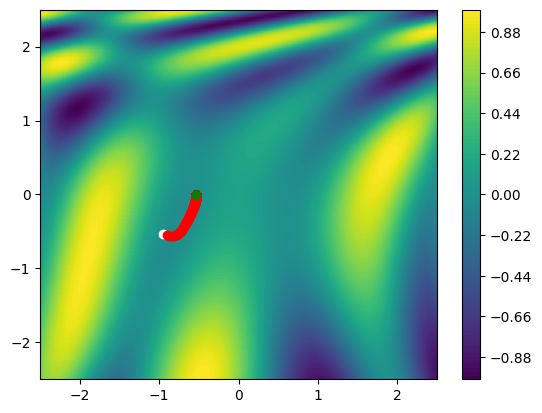

Solucion: [-0.5348763589026408, -0.005346856421910837] -0.0007015972784960326


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=2.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-1,1  ),random.uniform(-1,1 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:500
for i in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")
  print(f"Iteration {i+1}, Learning Rate: {TA:.4f}")

  TA = TA / (1 + i/100000)



#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


### Múltiples Inicializaciones Aleatorias
Existe varios minímos locales, entonces aplicamos múltiples inicializaciones y cogemos el mínimo el cual es muy cerca del minímo global.

In [ ]:
min = math.inf
Pmin = None
for i in range(800):
  #Generamos un punto aleatorio inicial y pintamos de blanco
  P=[random.uniform(-1,1  ),random.uniform(-1,1 ) ]
  #Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
  TA=.1

  #Iteraciones:500
  for i in range(1000):
    grad = df(P)
    #print(P,grad)
    P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
    if(i%5):
      TA = TA / (1 + i/1000)
  if(f(P)<min):
    min = f(P)
    Pmin = P

print(Pmin)
print(min)

[1.0099448943883014, -2.784687128933355]
-0.9832197912854159


##Problema de Autobuses por Fuerza Bruta

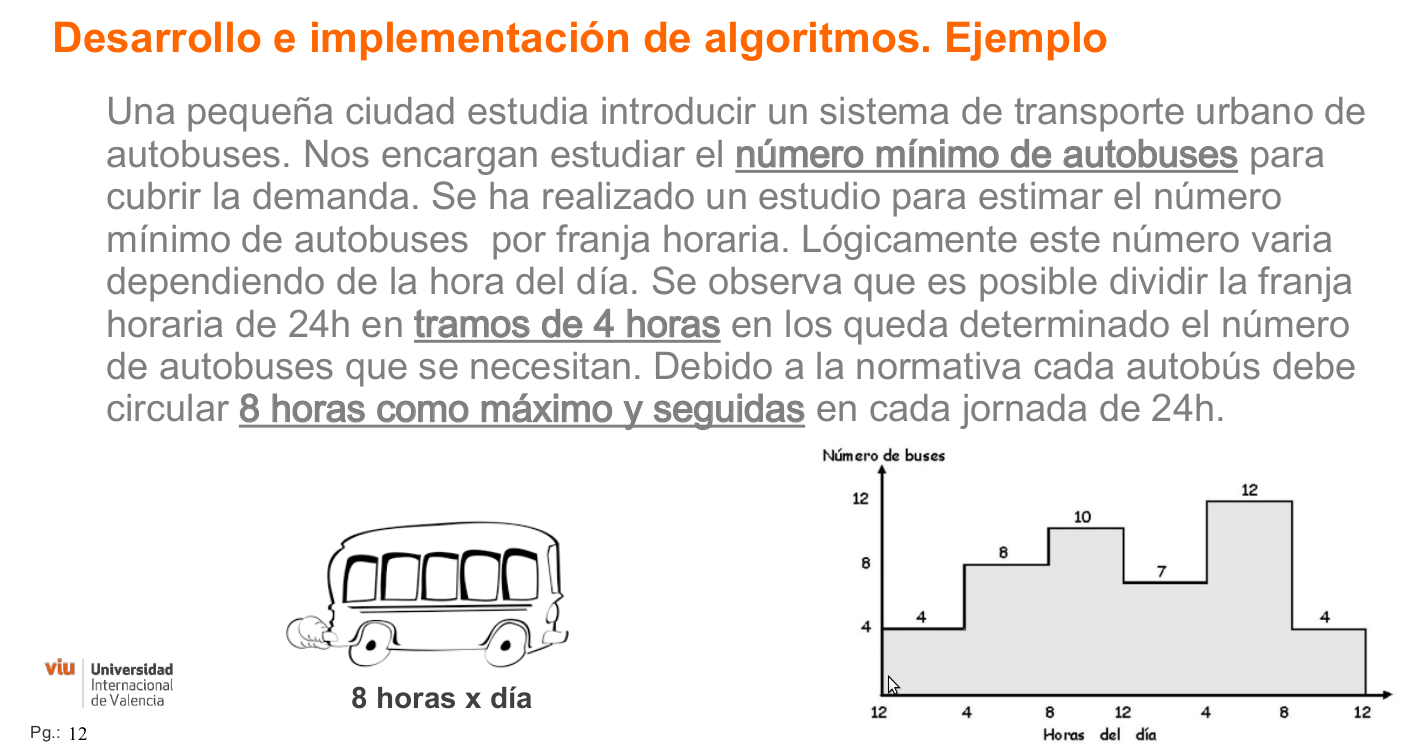

In [ ]:
###################################################
# Ximo Sanz Tornero.
###################################################
from itertools import product

# Paso 1: Inicializamos los datos
# Demanda mínima de autobuses por tramo
demanda = [4, 8, 10, 7, 12, 4]  # d[0], d[1], ..., d[5]
tramos = len(demanda)  # Número de tramos (6 en este caso)


#Posible Solucion
x = [4,5,6,7,8,9]

for t in range(tramos):
    # Calculamos el número actual de autobuses que están cubriendo el tramo t
    cobertura_actual = x[t] + x[t - 1]  # Autobuses en t y t-1 (cíclico)

    # Si la cobertura actual es menor que la demanda, añadimos autobuses en t
    if cobertura_actual < demanda[t]:
        # Añadimos los autobuses necesarios en el tramo t
        x[t] += demanda[t] - cobertura_actual

#Función objetivo
f_objetivo = sum(x)


# Se crean funciones tanto para verificar posibles soluciones como para obtener el valor de la función objetivo de la solución
# Función objetivo: suma de todos los x[i]
def funcion_objetivo(solucion):
    return sum(solucion)

# Verificación de restricciones
def verifica_restricciones(solucion):
    for t in range(tramos):
        # Se calcula el número actual de autobuses que están cubriendo el tramo t
        cobertura_actual = solucion[t] + solucion[t - 1]  # Cíclico
        if cobertura_actual < demanda[t]:
            return False
    return True


# Se realiza el algoritmo por fuerza bruta con todas las posibles combinaciones de valores que tenemos en funcion de la variable demanda
# Generación del espacio de soluciones
# Para ver mejor el funcionamiento, ejecutar: for solucion in product(*(range(d + 1) for d in [1,2,3])):   print(solucion)
espacio_soluciones = product(*(range(d + 1) for d in demanda))

# Búsqueda de la mejor solución
mejor_valor_objetivo = float('inf')
mejores_soluciones = []

for solucion in espacio_soluciones:
    if verifica_restricciones(solucion):
        valor_objetivo = funcion_objetivo(solucion)
        if valor_objetivo < mejor_valor_objetivo:
            mejor_valor_objetivo = valor_objetivo
            mejores_soluciones = [solucion]
        elif valor_objetivo == mejor_valor_objetivo:
            mejores_soluciones.append(solucion)  # Agrega soluciones con el mismo valor

# Resultado
print("Mejores soluciones:")
for solucion in mejores_soluciones:
    print(solucion)
print("Valor mínimo de la función objetivo:", mejor_valor_objetivo)



Mejores soluciones:
(0, 8, 2, 5, 7, 4)
(0, 8, 2, 6, 6, 4)
(0, 8, 2, 7, 5, 4)
(1, 7, 3, 4, 8, 3)
(1, 7, 3, 5, 7, 3)
(1, 7, 3, 6, 6, 3)
(1, 7, 3, 7, 5, 3)
(1, 8, 2, 5, 7, 3)
(1, 8, 2, 6, 6, 3)
(1, 8, 2, 7, 5, 3)
(2, 6, 4, 3, 9, 2)
(2, 6, 4, 4, 8, 2)
(2, 6, 4, 5, 7, 2)
(2, 6, 4, 6, 6, 2)
(2, 6, 4, 7, 5, 2)
(2, 7, 3, 4, 8, 2)
(2, 7, 3, 5, 7, 2)
(2, 7, 3, 6, 6, 2)
(2, 7, 3, 7, 5, 2)
(2, 8, 2, 5, 7, 2)
(2, 8, 2, 6, 6, 2)
(2, 8, 2, 7, 5, 2)
(3, 5, 5, 2, 10, 1)
(3, 5, 5, 3, 9, 1)
(3, 5, 5, 4, 8, 1)
(3, 5, 5, 5, 7, 1)
(3, 5, 5, 6, 6, 1)
(3, 5, 5, 7, 5, 1)
(3, 6, 4, 3, 9, 1)
(3, 6, 4, 4, 8, 1)
(3, 6, 4, 5, 7, 1)
(3, 6, 4, 6, 6, 1)
(3, 6, 4, 7, 5, 1)
(3, 7, 3, 4, 8, 1)
(3, 7, 3, 5, 7, 1)
(3, 7, 3, 6, 6, 1)
(3, 7, 3, 7, 5, 1)
(3, 8, 2, 5, 7, 1)
(3, 8, 2, 6, 6, 1)
(3, 8, 2, 7, 5, 1)
(4, 4, 6, 1, 11, 0)
(4, 4, 6, 2, 10, 0)
(4, 4, 6, 3, 9, 0)
(4, 4, 6, 4, 8, 0)
(4, 4, 6, 5, 7, 0)
(4, 4, 6, 6, 6, 0)
(4, 4, 6, 7, 5, 0)
(4, 5, 5, 2, 10, 0)
(4, 5, 5, 3, 9, 0)
(4, 5, 5, 4, 8, 0)
(4, 5, 5, 5, 7, 0)
(4, 5, 

In [ ]:
for solucion in product(*(range(d + 1) for d in [1,2,3])):   print(solucion)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
